### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing thompson sampling

In [3]:
import random
N = len(dataset)-9500 #Total_Users
d = len(dataset.columns) #Total_Ads
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    
    total_reward += reward

In [4]:
### Visualising the results - Histogram

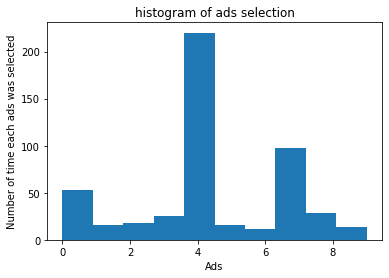

In [5]:
plt.hist(ads_selected)
plt.title('histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of time each ads was selected')
plt.show()